Importing Library and uploading data set

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Atom Camp/Food data.csv')

Now to understand how does data look like, we'll use info function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [5]:
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


Using value count function to identity inconsistencies of the data and also checking categorical and continuous data

In [6]:
# value_count of column staff experience

df['staff_experience'].value_counts()


,count
staff_experience,
Beginner,381
Intermediate,368
intermediate,366
EXPERT,346
Pro,24


In [7]:
#replace intermediate with Intermediate

df['staff_experience'] = df['staff_experience'].str.replace('intermediate', 'Intermediate')


In [8]:

df['staff_experience'].value_counts()

,count
staff_experience,
Intermediate,734
Beginner,381
EXPERT,346
Pro,24


To cater missing values and data inconsistencies, imputing method has been used and approprite replacement of data has been done.

In [9]:
# number of missing values in column staff_experience

missing_values = df['staff_experience'].isnull().sum()
print(f"Number of missing values in 'staff_experience' column: {missing_values}")



Number of missing values in 'staff_experience' column: 337


Just to make sure that missing values are not big enough to exclude whole data.

In [10]:

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage


,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
past_waste_kg,0.878156
staff_experience,18.496158


In [74]:
# calculate number of duplicate in all data set based on ID

duplicate_count = df['ID'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_count}")


Number of duplicate IDs: 0


In [12]:
# replace missing values of staff_experience with "Unknown"

df['staff_experience'] = df['staff_experience'].fillna("Unknown")


In [13]:
df['staff_experience'].value_counts()

,count
staff_experience,
Intermediate,734
Beginner,381
EXPERT,346
Unknown,337
Pro,24


In [14]:
df['waste_category'].value_counts()

,count
waste_category,
MEAT,419
dairy,351
Vegetables,350
MeAt,335
GRAINS,317
Barley,15
Wheat,14


In [15]:
# To fix data inconsistencies, replace 'MEAT' and 'MeAt" with "Meat"

df['waste_category'] = df['waste_category'].str.replace('MEAT', 'Meat')
df['waste_category'] = df['waste_category'].str.replace('MeAt', 'Meat')


In [16]:
df['waste_category'].value_counts()

,count
waste_category,
Meat,754
dairy,351
Vegetables,350
GRAINS,317
Barley,15
Wheat,14


In [17]:
df['waste_category'] = df['waste_category'].str.replace('dairy', 'Dairy')

In [18]:
df['waste_category'] = df['waste_category'].str.replace('GRAINS' , 'Grains')

In [19]:
df['waste_category'].value_counts()

,count
waste_category,
Meat,754
Dairy,351
Vegetables,350
Grains,317
Barley,15
Wheat,14


In [20]:
df['waste_category'] = df['waste_category'].str.replace('Barley' , 'Grains')
df['waste_category']= df['waste_category'].str.replace('Wheat', 'Grains')

In [21]:
df['waste_category'].value_counts()

,count
waste_category,
Meat,754
Dairy,351
Vegetables,350
Grains,346


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1822 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [23]:
df['special_event'].value_counts()

,count
special_event,
0,1666
1,148
One,8


In [24]:
df['special_event']= df['special_event'].str.replace('One', '1')

In [25]:
df['special_event'].value_counts()

,count
special_event,
0,1666
1,148
1,8


In [26]:
# making data type object to int

# Convert 'special_event' column to numeric, coercing errors to NaN
df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce')

# Fill NaN values in 'special_event' with 0 (or another appropriate value)
df['special_event'] = df['special_event'].fillna(0)

# Convert the column to integers
df['special_event'] = df['special_event'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   int64  
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1822 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 156.7+ KB


In [27]:
df['kitchen_staff'].value_counts()

,count
kitchen_staff,
12,143
5,138
10,130
13,127
9,127
15,123
18,121
14,117
7,117


In [28]:
df['kitchen_staff']= df['kitchen_staff'].str.replace('ten', '10')
df['kitchen_staff']= df['kitchen_staff'].str.replace('eleven', '11')

In [29]:

df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')


df['kitchen_staff'] = df['kitchen_staff'].fillna(0)


df['kitchen_staff'] = df['kitchen_staff'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1822 non-null   int64  
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   int64  
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1822 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 156.7+ KB


In [31]:
# converting data type of date from object to date

# Assuming 'Date' is the column name containing the date information
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1790 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1806 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1806 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


Before progessing forward, to fill in data that is missing the histogram method is used to analyze the nature of the data

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(array([1.744e+03, 0.000e+00, 6.000e+00, 6.000e+00, 1.000e+00, 4.000e+00,
        8.000e+00, 4.000e+00, 8.000e+00, 9.000e+00]),
 array([ 100.,  563., 1026., 1489., 1952., 2415., 2878., 3341., 3804.,
        4267., 4730.]),
 <BarContainer object of 10 artists>)

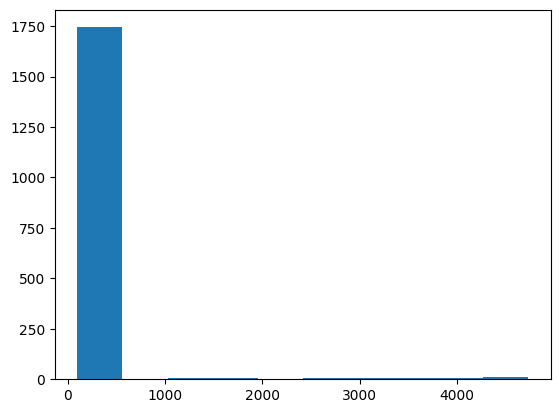

In [33]:
plt.hist(df['meals_served'])

In [34]:
# Calculate the mode of the 'meals_served' column
mode_meals_served = df['meals_served'].mode()[0]
print(f"Mode of meals_served: {mode_meals_served}")


Mode of meals_served: 259.0


In [35]:

# Calculate the median of the 'meals_served' column
median_meals_served = df['meals_served'].median()
print(f"Median of meals_served: {median_meals_served}")


Median of meals_served: 306.0


Since the data was skewed, and it was continuous, median replacement method has beeen used.

In [36]:
# replacing missing values of "meals_served" with 306

# Fill missing values in 'meals_served' with 306
df['meals_served'] = df['meals_served'].fillna(306)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1806 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1806 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


In [37]:
df['humidity_percent'].value_counts()

,count
humidity_percent,
69.316945,4
81.983191,4
75.554924,4
42.931792,4
51.622669,4
...,...
78.496526,1
61.633571,1
61.352383,1


(array([193., 135., 173., 166., 194., 200., 172., 178., 214., 181.]),
 array([30.12111106, 36.10728278, 42.0934545 , 48.07962622, 54.06579794,
        60.05196965, 66.03814137, 72.02431309, 78.01048481, 83.99665653,
        89.98282825]),
 <BarContainer object of 10 artists>)

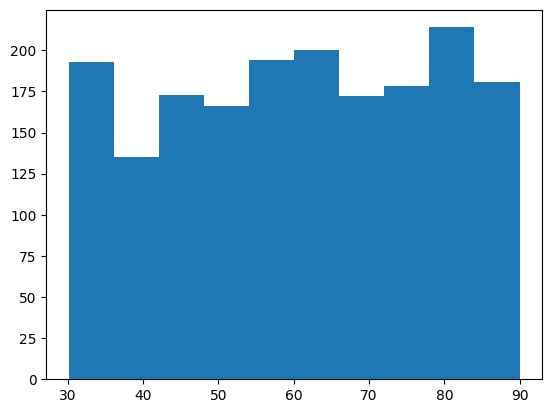

In [38]:
plt.hist(df['humidity_percent'])

In [39]:
median_humidity_percent = df['humidity_percent'].median()
print(f"Median of humidity_percent: {median_humidity_percent}")

Median of humidity_percent: 61.63493525


In [40]:
df['humidity_percent'] = df['humidity_percent'].fillna(61.63493525)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1806 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


Now checking the IQR of each column.

In [75]:
# calculate IQR or all numeric column and then calculate outliers and make the box plot for each

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Outliers for {col}:\n{outliers}")


Outliers for ID:
Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category]
Index: []
Outliers for meals_served:
        ID       date  meals_served  kitchen_staff  temperature_C  \
16      16 2023-10-13        1560.0              8      23.740401   
21      21 2023-07-25        1110.0             11      15.520066   
129    129 2022-11-16        2930.0             19      17.929893   
176    176 2023-09-15        3160.0             14      29.529261   
213    213 2022-08-04        1510.0             11      12.434835   
244    244 2023-02-14        1380.0              5      13.742599   
265    265 2024-04-12        2440.0             13      15.630593   
284    284 2022-07-16        3580.0              7      24.943089   
318    318 2024-02-02        1070.0              9      10.726785   
321    321 2022-08-17        3190.0              5      19.916494   
368    368 2

In [43]:
df['past_waste_kg'].value_counts()

,count
past_waste_kg,
34.982054,4
41.551615,4
7.961529,4
48.955747,4
34.997769,4
...,...
10.981762,1
31.514658,1
40.841798,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1806 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


(array([182., 183., 193., 193., 170., 177., 180., 194., 184., 150.]),
 array([ 5.00839377,  9.48792464, 13.96745552, 18.44698639, 22.92651726,
        27.40604814, 31.88557901, 36.36510989, 40.84464076, 45.32417164,
        49.80370251]),
 <BarContainer object of 10 artists>)

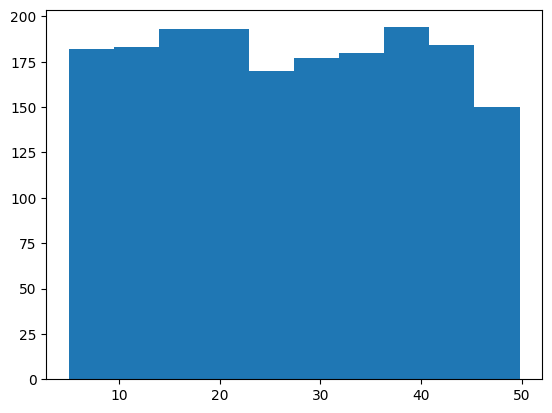

In [45]:
plt.hist(df['past_waste_kg'])

In [46]:
# calculate median of past_waste_kg

# Calculate the median of the 'past_waste_kg' column
median_past_waste_kg = df['past_waste_kg'].median()
print(f"Median of past_waste_kg: {median_past_waste_kg}")


Median of past_waste_kg: 26.832568600000002


In [47]:
# Calculate mode of past_waste_kg

# Calculate the mode of the 'past_waste_kg' column
mode_past_waste_kg = df['past_waste_kg'].mode()[0]
print(f"Mode of past_waste_kg: {mode_past_waste_kg}")


Mode of past_waste_kg: 7.961529231


In [48]:

# Fill missing values in 'past_waste_kg' with the median
df['past_waste_kg'] = df['past_waste_kg'].fillna(median_past_waste_kg)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1822 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


In [50]:
df['waste_category'].value_counts()

,count
waste_category,
Meat,754
Dairy,351
Vegetables,350
Grains,346


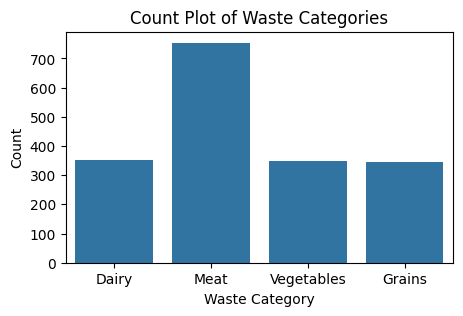

In [51]:
# Generating a count plot


plt.figure(figsize=(5, 3))
sns.countplot(x='waste_category', data=df)
plt.title('Count Plot of Waste Categories')
plt.xlabel('Waste Category')
plt.ylabel('Count')
plt.show()


In [52]:
# Number of missing value in waste category and % of missing

# Number of missing values in 'waste_category'
missing_waste_category = df['waste_category'].isnull().sum()
print(f"Number of missing values in 'waste_category': {missing_waste_category}")

# Percentage of missing values in 'waste_category'
missing_waste_category_percentage = (missing_waste_category / len(df)) * 100
print(f"Percentage of missing values in 'waste_category': {missing_waste_category_percentage:.2f}%")


Number of missing values in 'waste_category': 21
Percentage of missing values in 'waste_category': 1.15%


In [53]:
# Replace missing values in 'waste_category' with 'Meat'
df['waste_category'] = df['waste_category'].fillna("Meat")


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1822 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1822 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


In [55]:
df.describe()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,1822.000000,1822,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000,1822.000000
mean,910.500000,2023-04-22 09:30:37.541163520,372.327113,11.787047,22.189280,60.798665,3.01427,0.085620,26.996085
min,0.000000,2022-01-01 00:00:00,100.000000,0.000000,-10.372207,30.121111,0.00000,0.000000,5.008394
25%,455.250000,2022-07-25 06:00:00,212.250000,8.000000,15.684259,46.137537,1.00000,0.000000,16.148956
50%,910.500000,2023-04-23 00:00:00,306.000000,12.000000,22.115040,61.634935,3.00000,0.000000,26.832569
75%,1365.750000,2024-01-07 18:00:00,405.750000,15.000000,28.807494,75.755784,5.00000,0.000000,37.978663
max,1821.000000,2024-09-26 00:00:00,4730.000000,19.000000,60.000000,89.982828,6.00000,1.000000,49.803703
std,526.110413,NaN,490.505492,4.429903,8.919939,17.250127,2.00899,0.279879,12.735579


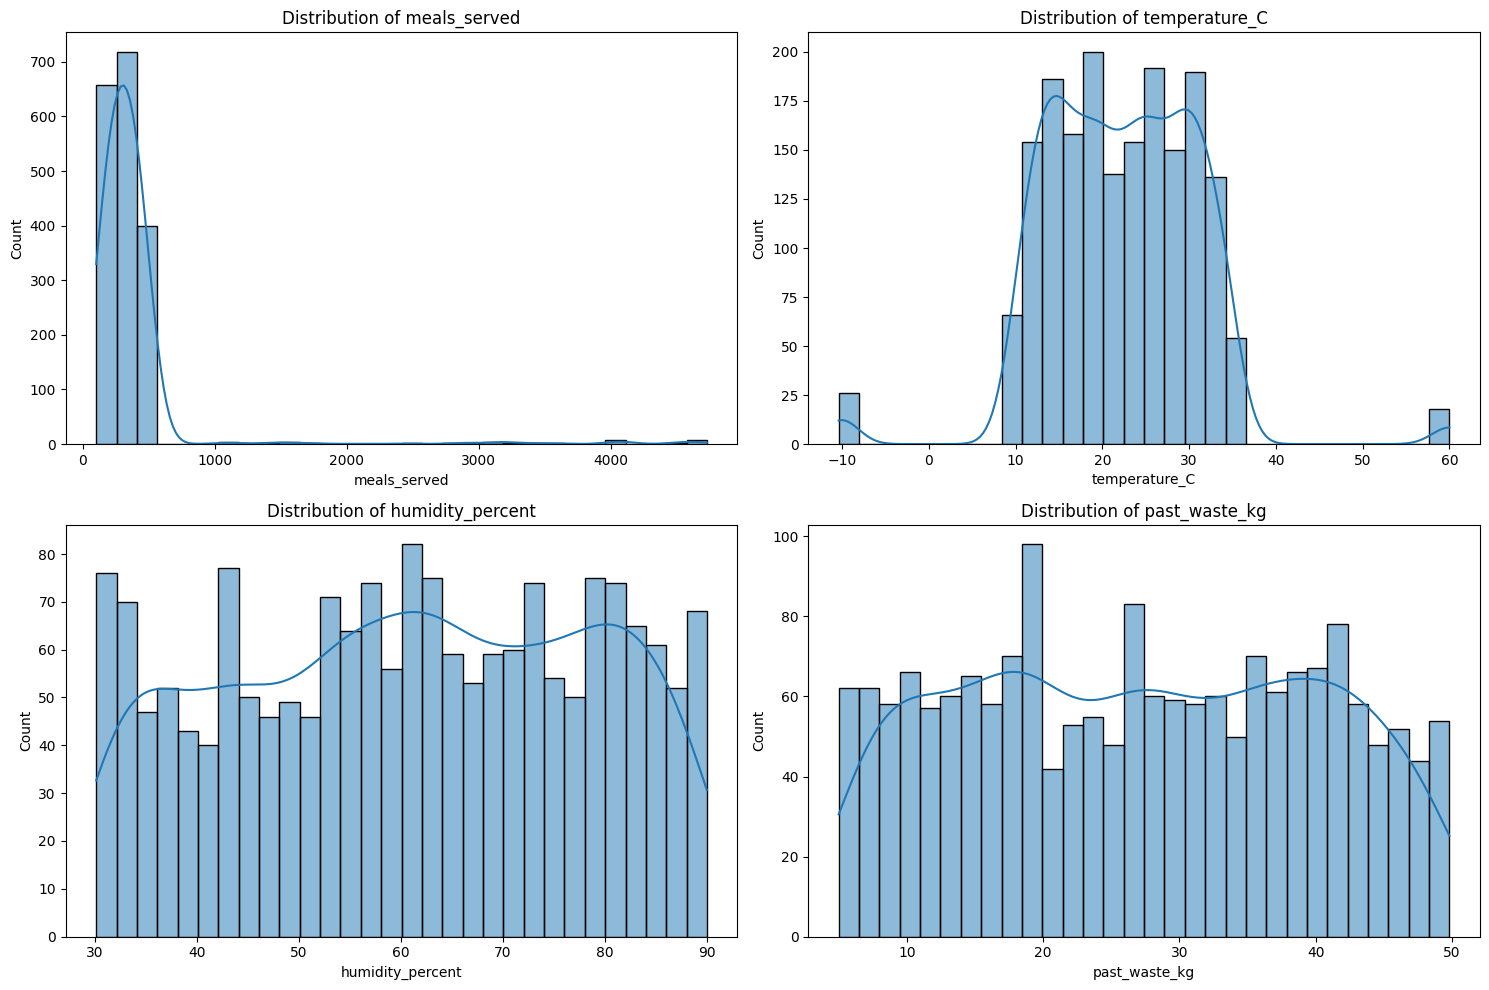

In [56]:
# Making graphs: Histogram
numerical_features = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Making Box plots

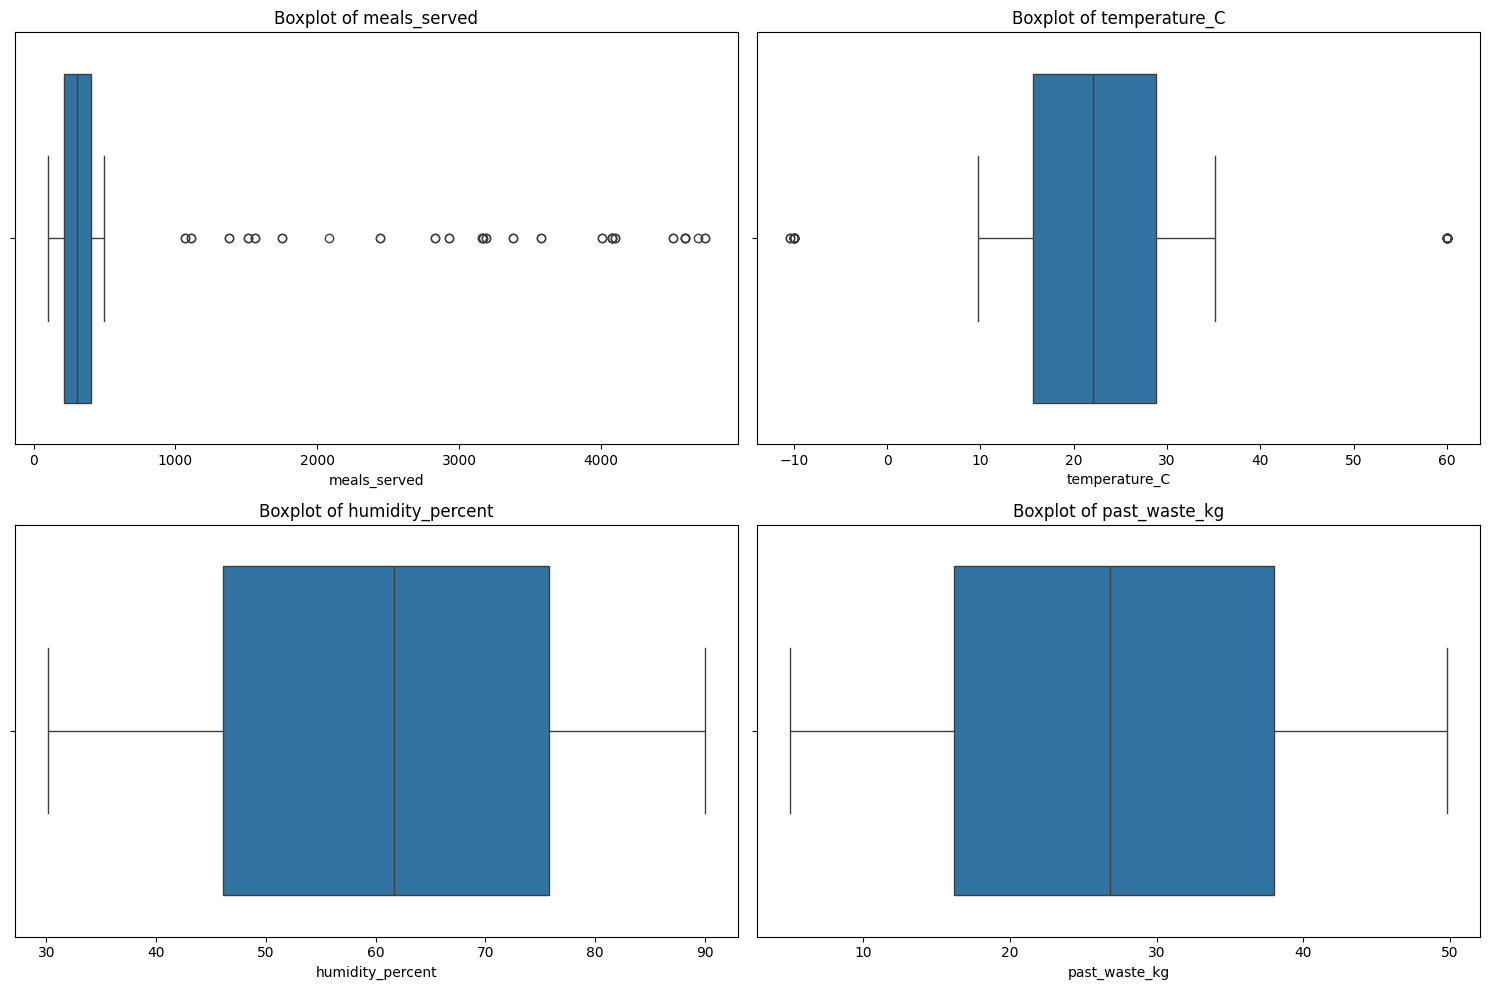

In [57]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Making Count Plots

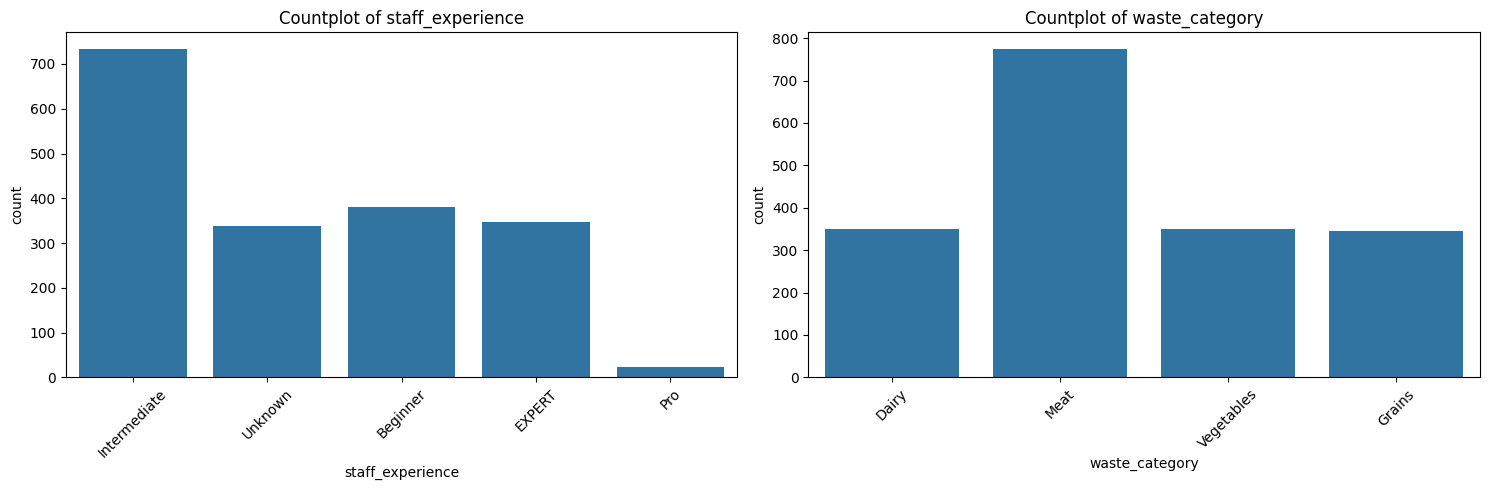

In [58]:
categorical_features = ['staff_experience', 'waste_category']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df[feature])
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


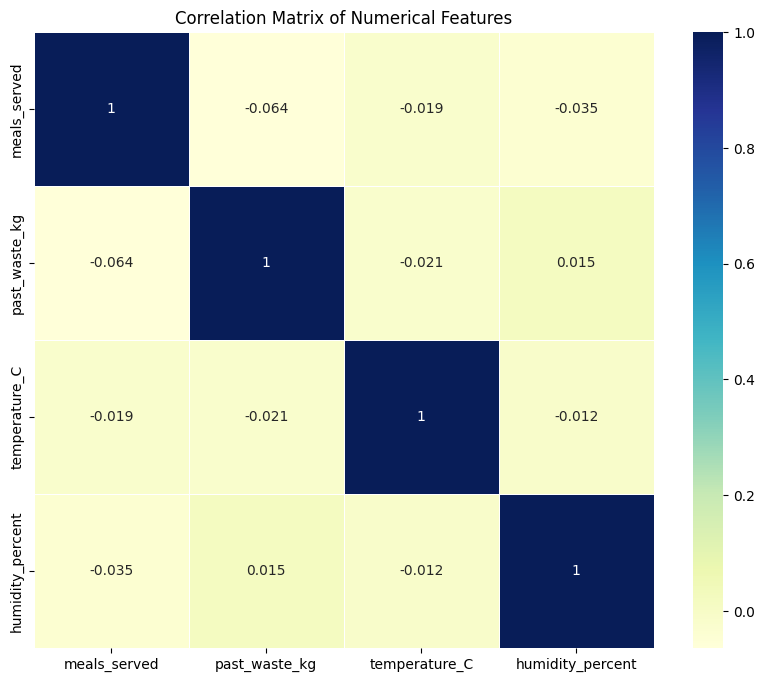

In [59]:
# Making Correlation Matrix
correlation_matrix = df[['meals_served', 'past_waste_kg', 'temperature_C', 'humidity_percent']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [60]:
correlation_meals_waste = df[['meals_served', 'past_waste_kg']].corr().iloc[0, 1]
print(f"Correlation between Meals Served and Past Waste: {correlation_meals_waste:.2f}")


Correlation between Meals Served and Past Waste: -0.06


In [61]:
correlation_temp_waste = df[['temperature_C', 'past_waste_kg']].corr().iloc[0, 1]
correlation_humidity_waste = df[['humidity_percent', 'past_waste_kg']].corr().iloc[0, 1]

print(f"Correlation between Temperature and Past Waste: {correlation_temp_waste:.2f}")
print(f"Correlation between Humidity and Past Waste: {correlation_humidity_waste:.2f}")


Correlation between Temperature and Past Waste: -0.02
Correlation between Humidity and Past Waste: 0.01


Making Pairplots

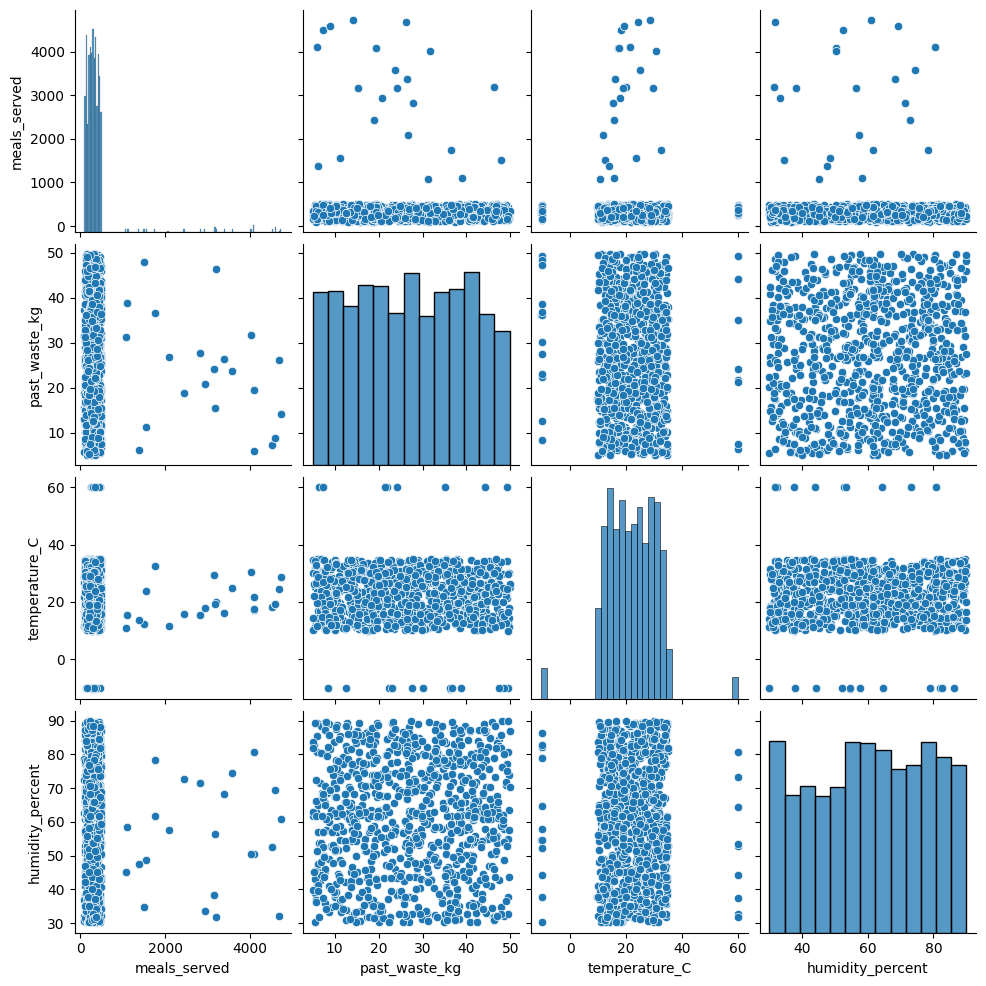

In [62]:
sns.pairplot(df[['meals_served', 'past_waste_kg', 'temperature_C', 'humidity_percent']])
plt.show()

Hypothesis Testing for further analysis

In [63]:
import scipy.stats as stats
import pandas as pd

# Extract groups based on kitchen staff size
staff_5 = df[df['kitchen_staff'] == 5]['past_waste_kg']
staff_10 = df[df['kitchen_staff'] == 10]['past_waste_kg']
staff_15 = df[df['kitchen_staff'] == 15]['past_waste_kg']

# Perform ANOVA
anova_result = stats.f_oneway(staff_5,
                              staff_10,
                              staff_15)
print("\nANOVA Result:", anova_result)



ANOVA Result: F_onewayResult(statistic=np.float64(0.5386196344433796), pvalue=np.float64(0.5839844588034251))


In [64]:
kruskal_result = stats.kruskal(staff_5, staff_10, staff_15)
print("\nKruskal-Wallis Test Result:", kruskal_result)



Kruskal-Wallis Test Result: KruskalResult(statistic=np.float64(1.0443411786012848), pvalue=np.float64(0.593231487546253))


In [65]:
# Extract groups based on special event status
event_days = df[df['special_event'] == 1]['past_waste_kg']
regular_days = df[df['special_event'] == 0]['past_waste_kg']

# Perform t-test
ttest_result = stats.ttest_ind(event_days, regular_days, equal_var=False)
print("\nT-test Result:", ttest_result)



T-test Result: TtestResult(statistic=np.float64(0.28511920513982814), pvalue=np.float64(0.7758695997563239), df=np.float64(186.26174447167193))


In [66]:
mann_whitney_result = stats.mannwhitneyu(event_days, regular_days)
print("\nMann-Whitney U Test Result:", mann_whitney_result)



Mann-Whitney U Test Result: MannwhitneyuResult(statistic=np.float64(131797.0), pvalue=np.float64(0.7686181802467796))


In [67]:
# Extract groups based on staff experience
beginner = df[df['staff_experience'] == 'Beginner']['past_waste_kg']
intermediate = df[df['staff_experience'] == 'Intermediate']['past_waste_kg']
advanced = df[df['staff_experience'] == 'Advanced']['past_waste_kg']

# Perform ANOVA
anova_result_experience = stats.f_oneway(beginner, intermediate, advanced)
print("\nANOVA Result (Staff Experience):", anova_result_experience)



ANOVA Result (Staff Experience): F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))


<ipython-input-67-87ddca844015>:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result_experience = stats.f_oneway(beginner, intermediate, advanced)


Carrying out group by analysis for recommendations

In [72]:
# Grouping by the number of kitchen staff and calculating the average food waste
optimal_staff_df = df.groupby('kitchen_staff')['past_waste_kg'].mean().reset_index()

# Finding the staff level with the minimum average food waste
optimal_staff = optimal_staff_df.loc[optimal_staff_df['past_waste_kg'].idxmin()]

print(f"Optimal Number of Kitchen Staff to Minimize Food Waste: {optimal_staff['kitchen_staff']}")
print(f"Minimum Average Food Waste at this Level: {optimal_staff['past_waste_kg']:.2f} kg")


Optimal Number of Kitchen Staff to Minimize Food Waste: 18.0
Minimum Average Food Waste at this Level: 23.57 kg


In [73]:
# Grouping by temperature and calculating the average food waste
optimal_temp_df = df.groupby('temperature_C')['past_waste_kg'].mean().reset_index()

# Finding the temperature with the minimum average food waste
optimal_temperature = optimal_temp_df.loc[optimal_temp_df['past_waste_kg'].idxmin()]

print(f"Optimal Temperature to Minimize Food Waste: {optimal_temperature['temperature_C']}°C")
print(f"Minimum Average Food Waste at this Temperature: {optimal_temperature['past_waste_kg']:.2f} kg")


Optimal Temperature to Minimize Food Waste: 34.60878519°C
Minimum Average Food Waste at this Temperature: 5.01 kg
